## 25-06-2025

In [8]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv(r"C:\Users\91805\Downloads\IBM HR Analytics\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [11]:
le=LabelEncoder()
le

LabelEncoder()

In [12]:
df['Attrition']=le.fit_transform(df['Attrition'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)

In [17]:
x = df.drop(['Attrition', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)
y = df['Attrition']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
model=RandomForestClassifier(random_state=42)

In [20]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
ac=accuracy_score(y_test,y_pred)
ac

0.8809523809523809

In [23]:
cr=classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.94       255\n           1       0.83      0.13      0.22        39\n\n    accuracy                           0.88       294\n   macro avg       0.86      0.56      0.58       294\nweighted avg       0.88      0.88      0.84       294\n'

In [24]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[254,   1],
       [ 34,   5]], dtype=int64)

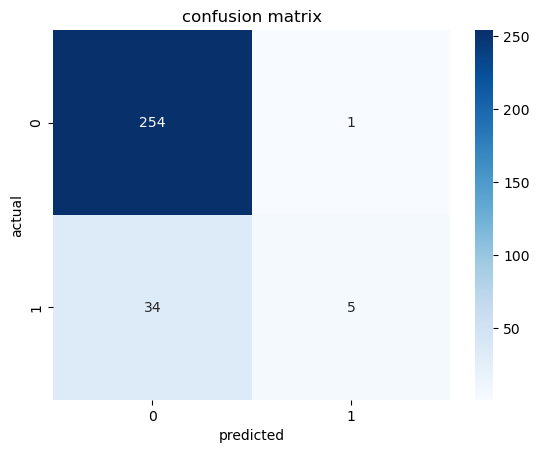

In [26]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("confusion matrix")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## 26-05-2025

In [2]:
def add(a,b):
    sum=a+b
    return sum
add(2,4)

6

## 07-07-2025

In [1]:
# Question :== Build a classification model to predict whether a student pass or fails an exam based on their study hours and number of pratice tests taken

import pandas as pd
data = {
    'StudyHours': [2, 4, 5, 3, 8, 6, 1, 7, 3, 5],
    'PracticeTests': [1, 3, 4, 2, 5, 4, 1, 4, 2, 3],
    'Pass': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
}
df=pd.DataFrame(data)
df

,StudyHours,PracticeTests,Pass
0,2,1,0
1,4,3,1
2,5,4,1
3,3,2,0
4,8,5,1
5,6,4,1
6,1,1,0
7,7,4,1
8,3,2,0
9,5,3,1


In [2]:
from sklearn.model_selection import train_test_split

x=df[['StudyHours','PracticeTests']]
y=df['Pass']

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
model=DecisionTreeClassifier(random_state=42)

In [6]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1], dtype=int64)

In [9]:
acc=accuracy_score(y_test,y_pred)
acc

0.6666666666666666

In [10]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [1, 1]], dtype=int64)

In [11]:
# Question 1: Predict if a customer buys a product (Logistic Regression)

import pandas as pd
df = pd.DataFrame({
    'Age': [22, 25, 47, 52, 46, 56, 55, 60, 48, 33],
    'Salary': [15000, 18000, 30000, 35000, 28000, 40000, 42000, 50000, 30000, 20000],
    'Buy': [0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
})
df

,Age,Salary,Buy
0,22,15000,0
1,25,18000,0
2,47,30000,1
3,52,35000,1
4,46,28000,1
5,56,40000,1
6,55,42000,1
7,60,50000,1
8,48,30000,1
9,33,20000,0


In [12]:
# predict if a customer buys or not based on age and salary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
x=df[['Age','Salary']]
y=df['Buy']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
model=LogisticRegression()

In [16]:
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred=model.predict(x_test)
y_pred

array([1, 0], dtype=int64)

In [18]:
ac=accuracy_score(y_test,y_pred)
ac

1.0

In [19]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [0, 1]], dtype=int64)

In [20]:
#  Question 2: Predict house price (Linear Regression)

import pandas as pd
df = pd.DataFrame({
    'Size': [750, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1400],
    'Bedrooms': [1, 1, 2, 2, 2, 3, 3, 3, 4, 4],
    'Price': [150000, 160000, 170000, 180000, 185000, 200000, 210000, 220000, 230000, 240000]
})
df

,Size,Bedrooms,Price
0,750,1,150000
1,800,1,160000
2,850,2,170000
3,900,2,180000
4,950,2,185000
5,1000,3,200000
6,1100,3,210000
7,1200,3,220000
8,1300,4,230000
9,1400,4,240000


In [21]:
# Predict price based on size and bedroom

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
x=df[['Size','Bedrooms']]
y=df['Price']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
model=LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=model.predict(x_test)
y_pred

array([236000.        , 157916.66666667, 197750.        ])

In [28]:
mse=mean_squared_error(y_test,y_pred)
mse

15134259.259259501

In [29]:
model.score(x_test,y_test)

0.9815934684684682

In [30]:
# Question 3: Cluster customers by spending (KMeans Clustering)

import pandas as pd
df = pd.DataFrame({
    'AnnualIncome': [15, 16, 17, 28, 30, 35, 70, 72, 75, 80],
    'SpendingScore': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
})
df

,AnnualIncome,SpendingScore
0,15,39
1,16,81
2,17,6
3,28,77
4,30,40
5,35,76
6,70,6
7,72,94
8,75,3
9,80,72


In [31]:
# Use KMeans to group customers into 2 clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [32]:
model=KMeans(n_clusters=2,random_state=42)

In [33]:
df['cluster']=model.fit_predict(df)

In [34]:
df

,AnnualIncome,SpendingScore,cluster
0,15,39,0
1,16,81,0
2,17,6,1
3,28,77,0
4,30,40,0
5,35,76,0
6,70,6,1
7,72,94,0
8,75,3,1
9,80,72,0


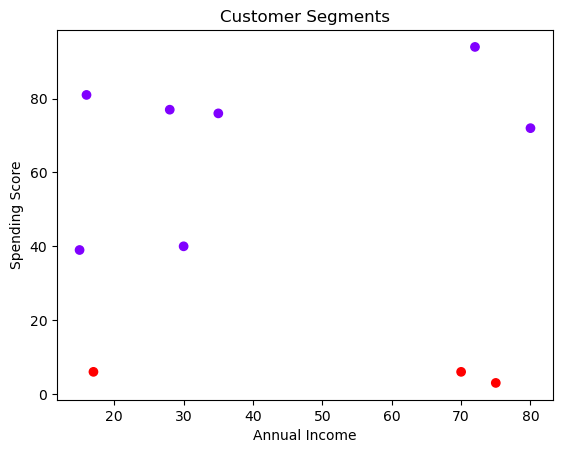

In [36]:
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

## KMEANS ALGORITHM

In [37]:
# Question 1: Cluster students based on exam scores

import pandas as pd
df = pd.DataFrame({
    'MathScore': [88, 92, 45, 70, 65, 95, 40, 60, 85, 78],
    'ScienceScore': [85, 90, 42, 72, 68, 97, 38, 58, 80, 75]
})
df

,MathScore,ScienceScore
0,88,85
1,92,90
2,45,42
3,70,72
4,65,68
5,95,97
6,40,38
7,60,58
8,85,80
9,78,75


In [38]:
# cluster students into 2 groups based on their scores

from sklearn.cluster import KMeans

model=KMeans(n_clusters=2,random_state=0)

In [39]:
df['cluster']=model.fit_predict(df)

In [40]:
df

,MathScore,ScienceScore,cluster
0,88,85,0
1,92,90,0
2,45,42,1
3,70,72,0
4,65,68,1
5,95,97,0
6,40,38,1
7,60,58,1
8,85,80,0
9,78,75,0


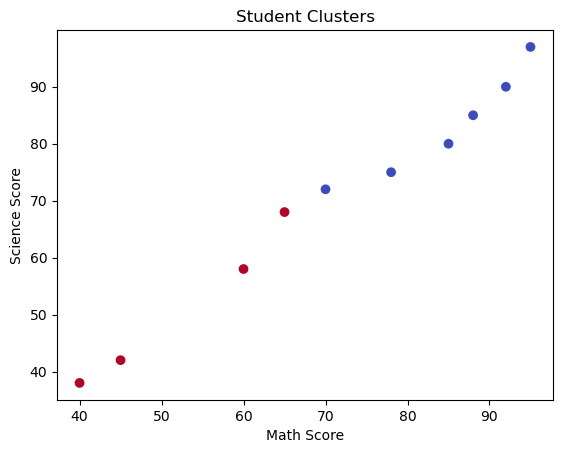

In [42]:
plt.scatter(df['MathScore'],df['ScienceScore'],c=df['cluster'],cmap='coolwarm')
plt.xlabel('Math Score')
plt.ylabel('Science Score')
plt.title('Student Clusters')
plt.show()

In [43]:
# Question 2: Cluster products based on price and sales

import pandas as pd

df = pd.DataFrame({
    'Price': [10, 12, 20, 25, 30, 8, 9, 27, 35, 40],
    'UnitsSold': [200, 180, 150, 120, 100, 220, 210, 130, 90, 80]
})
df

,Price,UnitsSold
0,10,200
1,12,180
2,20,150
3,25,120
4,30,100
5,8,220
6,9,210
7,27,130
8,35,90
9,40,80


In [44]:
# Cluster products into 3 groups

model=KMeans(n_clusters=3,random_state=1)

In [45]:
df['cluster1']=model.fit_predict(df)
df

,Price,UnitsSold,cluster1
0,10,200,1
1,12,180,1
2,20,150,2
3,25,120,2
4,30,100,0
5,8,220,1
6,9,210,1
7,27,130,2
8,35,90,0
9,40,80,0


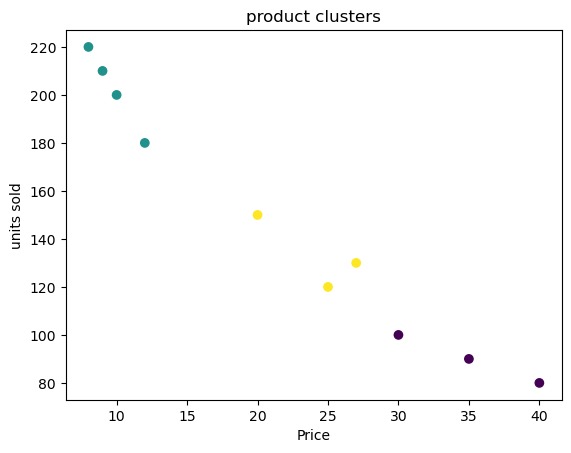

In [46]:
plt.scatter(df['Price'],df['UnitsSold'],c=df['cluster1'],cmap='viridis')
plt.xlabel('Price')
plt.ylabel('units sold')
plt.title('product clusters')
plt.show()

In [48]:
# Question 3: Cluster people based on age and annual income

import pandas as pd
df = pd.DataFrame({
    'Age': [22, 25, 28, 35, 40, 42, 55, 58, 60, 65],
    'AnnualIncome': [15000, 18000, 20000, 35000, 40000, 42000, 50000, 52000, 55000, 60000]
})
df

,Age,AnnualIncome
0,22,15000
1,25,18000
2,28,20000
3,35,35000
4,40,40000
5,42,42000
6,55,50000
7,58,52000
8,60,55000
9,65,60000


In [49]:
# Cluster into 2 groups and visualize

model=KMeans(n_clusters=2,random_state=42)
df['cluster2']=model.fit_predict(df)

In [50]:
df

,Age,AnnualIncome,cluster2
0,22,15000,0
1,25,18000,0
2,28,20000,0
3,35,35000,0
4,40,40000,1
5,42,42000,1
6,55,50000,1
7,58,52000,1
8,60,55000,1
9,65,60000,1


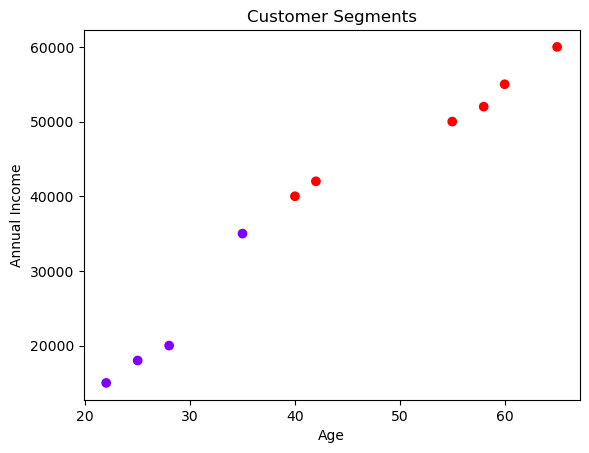

In [53]:
plt.scatter(df['Age'], df['AnnualIncome'], c=df['cluster2'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Customer Segments')
plt.show()

In [55]:
#  Question 4: Use elbow method to choose k (customer spending)
import pandas as pd
df = pd.DataFrame({
    'AnnualIncome': [15,16,17,18,19,20,40,42,43,44,45,70,72,73,74,75,80,82,85,90],
    'SpendingScore': [39,81,6,77,40,76,6,94,3,72,10,40,42,39,50,60,70,85,90,88]
})
df

,AnnualIncome,SpendingScore
0,15,39
1,16,81
2,17,6
3,18,77
4,19,40
5,20,76
6,40,6
7,42,94
8,43,3
9,44,72


In [56]:
# use elbow method to find optimal k
# fit Kmeans and visualize clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [57]:
# Elbow method
inertia=[]
elbow=range(1,7)
for k in elbow:
    model=KMeans(n_clusters=k,random_state=1)
    model.fit(df)
    inertia.append(model.inertia_)

In [59]:
model.inertia_

1437.1

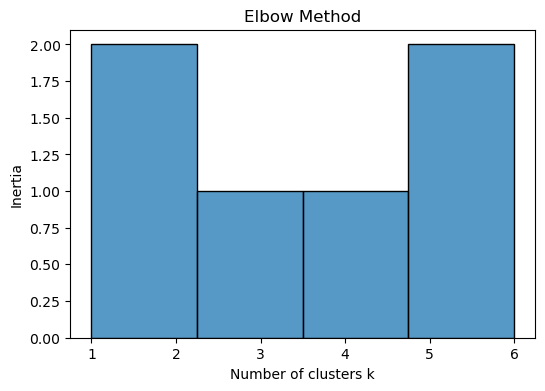

In [63]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(data=elbow)
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

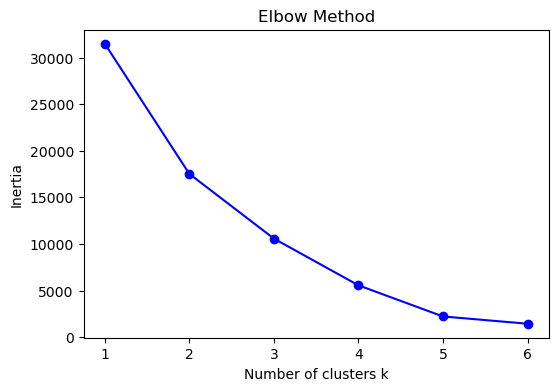

In [65]:
plt.figure(figsize=(6,4))
plt.plot(elbow, inertia, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [66]:
# let's choose k=3 based on elbow and fit

model=KMeans(n_clusters=3,random_state=1)

In [67]:
df['cluster']=model.fit_predict(df)

In [68]:
df

,AnnualIncome,SpendingScore,cluster
0,15,39,2
1,16,81,2
2,17,6,0
3,18,77,2
4,19,40,2
5,20,76,2
6,40,6,0
7,42,94,1
8,43,3,0
9,44,72,1


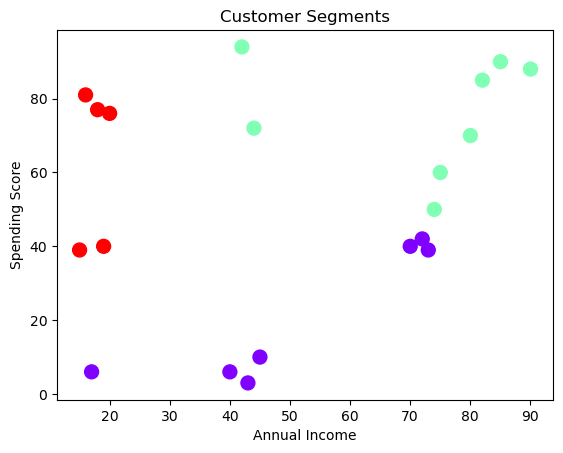

In [69]:
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['cluster'], cmap='rainbow', s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

In [1]:
# Question 2: Use silhouette score to choose k (product features)

import pandas as pd
df = pd.DataFrame({
    'Price': [10,12,20,25,30,8,9,27,35,40,42,38,31,29,19],
    'UnitsSold': [200,180,150,120,100,220,210,130,90,80,75,85,95,105,160]
})
df

,Price,UnitsSold
0,10,200
1,12,180
2,20,150
3,25,120
4,30,100
5,8,220
6,9,210
7,27,130
8,35,90
9,40,80


## 08-07-2025

In [3]:
# compute silhouette score for k=2....5
# choose k with highest silhouette
# visualize

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
scores = []
for k in range(2, 6):
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(df)
    score = silhouette_score(df, labels)
    scores.append(score)
    print(f"k={k}, silhouette={score:.2f}")


k=2, silhouette=0.66
k=3, silhouette=0.60
k=4, silhouette=0.50
k=5, silhouette=0.53


In [4]:
model=KMeans(n_clusters=2,random_state=0)
df['cluster']=model.fit_predict(df)

In [5]:
df

,Price,UnitsSold,cluster
0,10,200,1
1,12,180,1
2,20,150,1
3,25,120,0
4,30,100,0
5,8,220,1
6,9,210,1
7,27,130,0
8,35,90,0
9,40,80,0


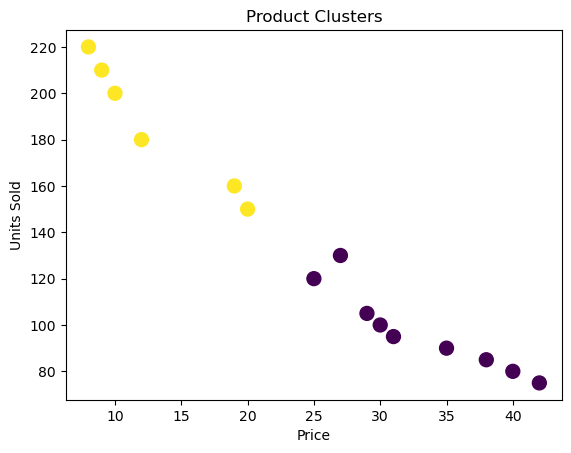

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['Price'],df['UnitsSold'],c=df['cluster'],cmap='viridis',s=100)
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.title('Product Clusters')
plt.show()

In [7]:
# Question 3: KMeans + PCA for 3D visualization (students performance)

import pandas as pd
df = pd.DataFrame({
    'Math': [88,92,45,70,65,95,40,60,85,78,82,58,69,73,55],
    'Science': [85,90,42,72,68,97,38,58,80,75,88,52,66,70,57],
    'English': [80,85,40,68,63,90,36,55,78,70,84,50,60,65,54]
})
df

,Math,Science,English
0,88,85,80
1,92,90,85
2,45,42,40
3,70,72,68
4,65,68,63
5,95,97,90
6,40,38,36
7,60,58,55
8,85,80,78
9,78,75,70


In [9]:
# Use PCA to reduce to 2D
# fit KMeans
# Visualize clusters

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca=PCA(n_components=2)
df_pca=pca.fit_transform(df)

In [10]:
model=KMeans(n_clusters=2,random_state=42)

In [11]:
labels=model.fit_predict(df_pca)
labels

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

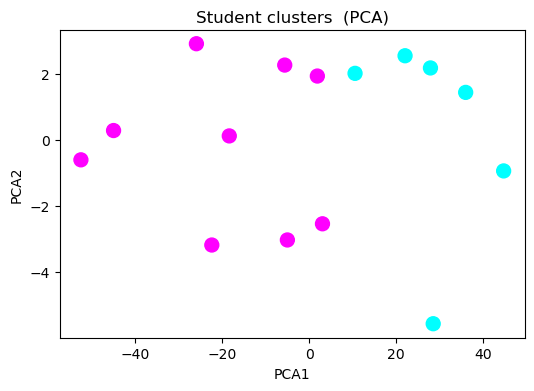

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(df_pca[:,0],df_pca[:,1],c=labels,cmap='cool',s=100)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Student clusters  (PCA)')
plt.show()

In [14]:
#  Question 4: Cluster animals by height and weight
import pandas as pd
df = pd.DataFrame({
    'Height': [25, 30, 45, 50, 15, 20, 80, 85, 90, 95],
    'Weight': [10, 12, 20, 22, 5, 7, 40, 42, 45, 48]
})
df

,Height,Weight
0,25,10
1,30,12
2,45,20
3,50,22
4,15,5
5,20,7
6,80,40
7,85,42
8,90,45
9,95,48


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
mode=KMeans(n_clusters=2,random_state=0)
df['clusters']=model.fit_predict(df)

In [17]:
df

,Height,Weight,clusters
0,25,10,0
1,30,12,0
2,45,20,0
3,50,22,0
4,15,5,0
5,20,7,0
6,80,40,1
7,85,42,1
8,90,45,1
9,95,48,1


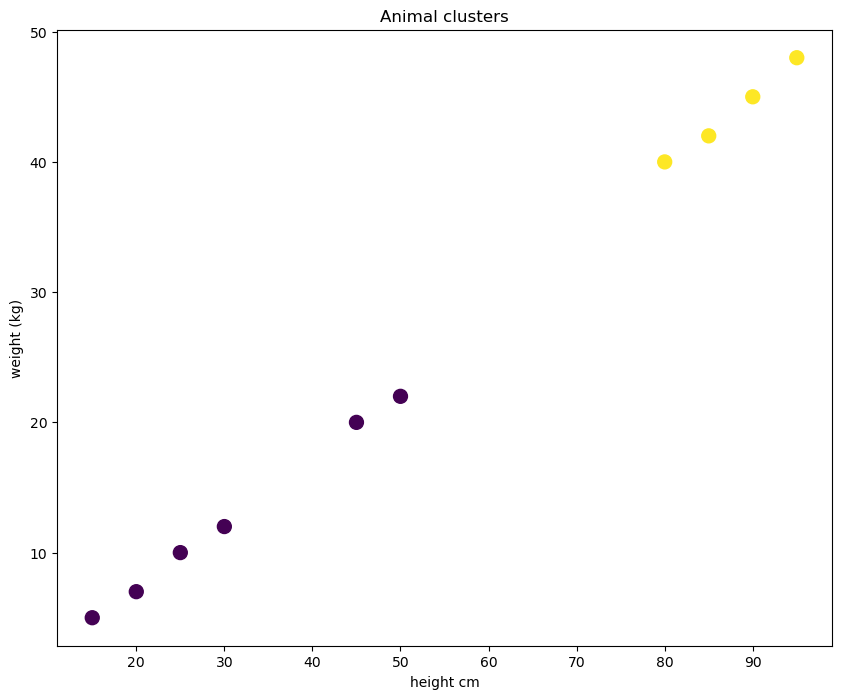

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(df['Height'],df['Weight'],c=df['clusters'],cmap='viridis',s=100)
plt.xlabel('height cm')
plt.ylabel('weight (kg)')
plt.title('Animal clusters')
plt.show()

## DECISION TREE CLASSIFIER

In [21]:
# Question 1: Predict if a person will buy insurance based on age and income

import pandas as pd

df = pd.DataFrame({
    'Age': [25, 30, 45, 35, 22, 55, 60, 48, 33, 28],
    'Income': [20000, 25000, 50000, 32000, 18000, 60000, 62000, 52000, 30000, 22000],
    'Buy': [0, 0, 1, 0, 0, 1, 1, 1, 0, 0]
})
df

,Age,Income,Buy
0,25,20000,0
1,30,25000,0
2,45,50000,1
3,35,32000,0
4,22,18000,0
5,55,60000,1
6,60,62000,1
7,48,52000,1
8,33,30000,0
9,28,22000,0


In [22]:
# Predict if a person will buy insurance based on age and income

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
x=df[['Age','Income']]
y=df['Buy']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
model=DecisionTreeClassifier(random_state=0)

In [26]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
y_pred=model.predict(x_test)
y_pred

array([0, 0], dtype=int64)

In [29]:
ac=accuracy_score(y_test,y_pred)
ac

1.0

In [30]:
cm=confusion_matrix(y_test,y_pred)
cm

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[2]], dtype=int64)

In [31]:
# Question 2: Predict if a student passes based on study time and practice tests

import pandas as pd
df = pd.DataFrame({
    'StudyHours': [2, 4, 5, 3, 8, 6, 1, 7, 3, 5],
    'PracticeTests': [1, 3, 4, 2, 5, 4, 1, 4, 2, 3],
    'Pass': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
})
df

,StudyHours,PracticeTests,Pass
0,2,1,0
1,4,3,1
2,5,4,1
3,3,2,0
4,8,5,1
5,6,4,1
6,1,1,0
7,7,4,1
8,3,2,0
9,5,3,1


In [32]:
x=df[['StudyHours','PracticeTests']]
y=df['Pass']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
model=DecisionTreeClassifier(criterion='gini')

In [39]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred=model.predict(x_test)
y_pred

array([0, 1], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [42]:
ac=accuracy_score(y_test,y_pred)
ac

1.0

In [43]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [0, 1]], dtype=int64)

In [44]:
# Question 3: Predict fruit type based on weight and sweetness

import pandas as pd
df = pd.DataFrame({
    'Weight': [150, 160, 200, 210, 130, 140, 300, 320, 310, 330],
    'Sweetness': [7, 6, 8, 7, 5, 4, 9, 10, 9, 10],
    'Fruit': ['Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Mango', 'Mango', 'Mango', 'Mango']
})
df

,Weight,Sweetness,Fruit
0,150,7,Apple
1,160,6,Apple
2,200,8,Apple
3,210,7,Apple
4,130,5,Apple
5,140,4,Apple
6,300,9,Mango
7,320,10,Mango
8,310,9,Mango
9,330,10,Mango


In [45]:
# predict if the fruit is Apple or mango based on features

from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [47]:
df['FruitEncoded']=le.fit_transform(df['Fruit'])

In [48]:
df

,Weight,Sweetness,Fruit,FruitEncoded
0,150,7,Apple,0
1,160,6,Apple,0
2,200,8,Apple,0
3,210,7,Apple,0
4,130,5,Apple,0
5,140,4,Apple,0
6,300,9,Mango,1
7,320,10,Mango,1
8,310,9,Mango,1
9,330,10,Mango,1


In [49]:
x=df[['Weight','Sweetness']]
y=df['FruitEncoded']

In [50]:
x_train,x_test,y_train,y_tets=train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
model=DecisionTreeClassifier(random_state=1)

In [52]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [53]:
y_pred=model.predict(x_test)
y_pred

array([0, 1])

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [55]:
ac=accuracy_score(y_test,y_pred)
ac

1.0

In [56]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [0, 1]], dtype=int64)

In [57]:
# Question 4: Predict if a customer will buy a product

import pandas as pd
df = pd.DataFrame({
    'Age': [22, 25, 28, 35, 40, 45, 50, 30, 26, 32],
    'Salary': [15000, 18000, 20000, 35000, 40000, 45000, 50000, 22000, 19000, 30000],
    'Buy': [0, 0, 0, 1, 1, 1, 1, 0, 0, 1]
})
df

,Age,Salary,Buy
0,22,15000,0
1,25,18000,0
2,28,20000,0
3,35,35000,1
4,40,40000,1
5,45,45000,1
6,50,50000,1
7,30,22000,0
8,26,19000,0
9,32,30000,1


In [58]:
# Train decision tree to predict buy and plot the tree and scatter plot

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [59]:
x=df[['Age','Salary']]
y=df['Buy']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [67]:
model=DecisionTreeClassifier(random_state=0,criterion='gini')

In [68]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

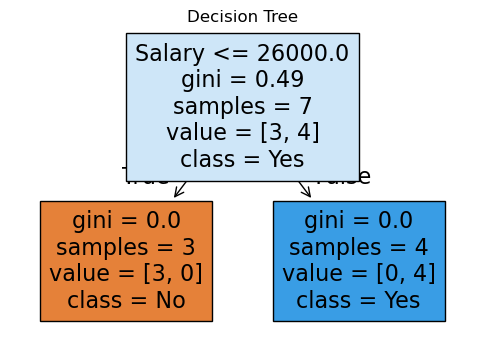

In [69]:
# plot the decision tree

plt.figure(figsize=(6,4))
plot_tree(model,max_depth=7,feature_names=['Age','Salary'],class_names=['No','Yes'],filled=True)
plt.title('Decision Tree')
plt.show()

In [70]:
df['predicted']=model.predict(x)
df

,Age,Salary,Buy,predicted
0,22,15000,0,0
1,25,18000,0,0
2,28,20000,0,0
3,35,35000,1,1
4,40,40000,1,1
5,45,45000,1,1
6,50,50000,1,1
7,30,22000,0,0
8,26,19000,0,0
9,32,30000,1,1


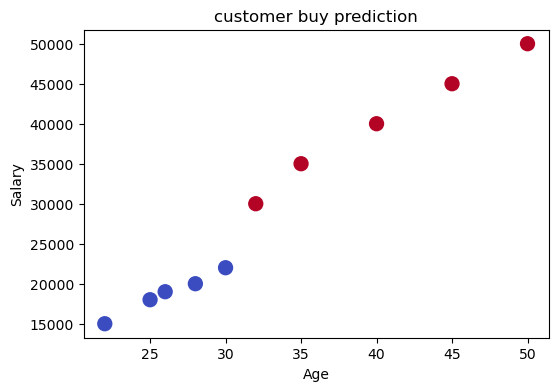

In [73]:
plt.figure(figsize=(6,4))
plt.scatter(df['Age'],df['Salary'],c=df['predicted'],cmap='coolwarm',s=100)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('customer buy prediction')
plt.show()

In [74]:
# Question 5: Predict if student passes based on hours studied and practice tests

import pandas as pd
df = pd.DataFrame({
    'HoursStudied': [2, 4, 5, 3, 8, 6, 1, 7, 3, 5],
    'PracticeTests': [1, 3, 4, 2, 5, 4, 1, 4, 2, 3],
    'Pass': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
})
df

,HoursStudied,PracticeTests,Pass
0,2,1,0
1,4,3,1
2,5,4,1
3,3,2,0
4,8,5,1
5,6,4,1
6,1,1,0
7,7,4,1
8,3,2,0
9,5,3,1


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [76]:
x=df[['HoursStudied','PracticeTests']]
y=df['Pass']

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
model=DecisionTreeClassifier(random_state=42)

In [81]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
y_pred=model.predict(x_test)
y_pred

array([0, 0], dtype=int64)

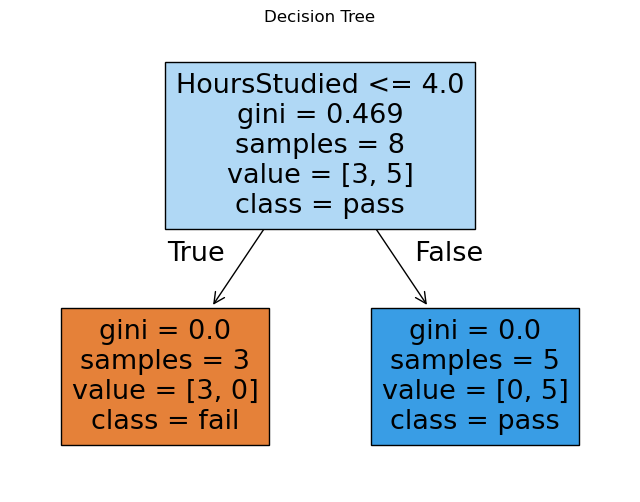

In [83]:
plt.figure(figsize=(8,6))
plot_tree(model,feature_names=['HoursStudied','PracticeTests'],class_names=['fail','pass'],filled=True)
plt.title('Decision Tree')
plt.show()

## 09-07-2025

In [1]:
# Question 1: Predict fruit type based on weight and sweetness

import pandas as pd
df = pd.DataFrame({
    'Weight': [150, 160, 200, 210, 140, 145, 300, 310, 320, 330],
    'Sweetness': [7, 6, 8, 7, 5, 6, 9, 10, 9, 10],
    'Fruit': ['Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Mango', 'Mango', 'Mango', 'Mango']
})
df

,Weight,Sweetness,Fruit
0,150,7,Apple
1,160,6,Apple
2,200,8,Apple
3,210,7,Apple
4,140,5,Apple
5,145,6,Apple
6,300,9,Mango
7,310,10,Mango
8,320,9,Mango
9,330,10,Mango


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [4]:
le=LabelEncoder()
df['fruitencoded']=le.fit_transform(df['Fruit'])
df

,Weight,Sweetness,Fruit,fruitencoded
0,150,7,Apple,0
1,160,6,Apple,0
2,200,8,Apple,0
3,210,7,Apple,0
4,140,5,Apple,0
5,145,6,Apple,0
6,300,9,Mango,1
7,310,10,Mango,1
8,320,9,Mango,1
9,330,10,Mango,1


In [5]:
x=df[['Weight','Sweetness']]
y=df['fruitencoded']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [8]:
model=DecisionTreeClassifier(random_state=1)


In [9]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

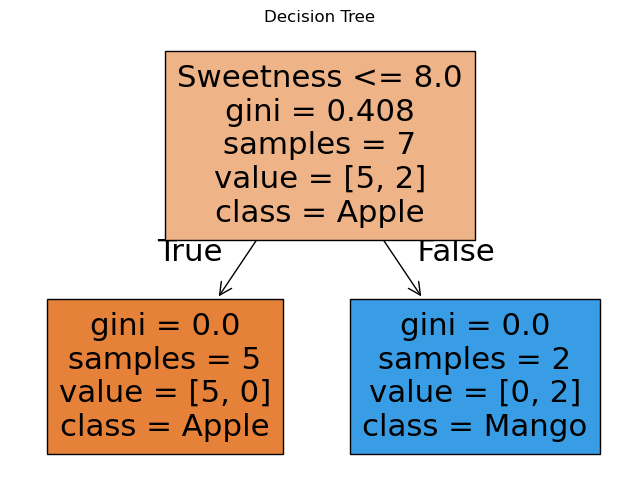

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(8,6))
plot_tree(model,feature_names=['Weight','Sweetness'],class_names=le.classes_,filled=True)
plt.title('Decision Tree')
plt.show()

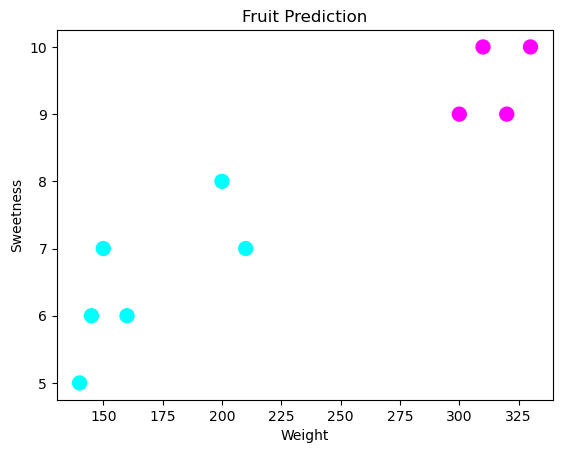

In [12]:
df['Predicted'] = model.predict(x)
plt.scatter(df['Weight'], df['Sweetness'], c=df['Predicted'], cmap='cool', s=100)
plt.xlabel('Weight')
plt.ylabel('Sweetness')
plt.title('Fruit Prediction')
plt.show()

In [14]:
# Question 2: Predict if a house is 'Expensive' or 'Cheap' based on size and number of bedrooms

import pandas as pd
df = pd.DataFrame({
    'Size': [800, 850, 900, 950, 1000, 1200, 1300, 1400, 1500, 1600],
    'Bedrooms': [2, 2, 2, 3, 3, 3, 4, 4, 4, 5],
    'Expensive': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})
df

,Size,Bedrooms,Expensive
0,800,2,0
1,850,2,0
2,900,2,0
3,950,3,0
4,1000,3,1
5,1200,3,1
6,1300,4,1
7,1400,4,1
8,1500,4,1
9,1600,5,1


In [15]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [16]:
x=df[['Size','Bedrooms']]
y=df['Expensive']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [18]:
model=DecisionTreeClassifier(random_state=0)

In [19]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

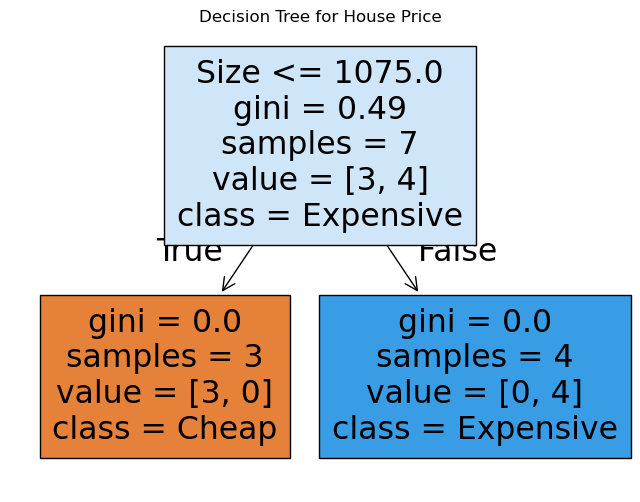

In [20]:
plt.figure(figsize=(8,6))
plot_tree(model, feature_names=['Size', 'Bedrooms'], class_names=['Cheap', 'Expensive'], filled=True)
plt.title('Decision Tree for House Price')
plt.show()

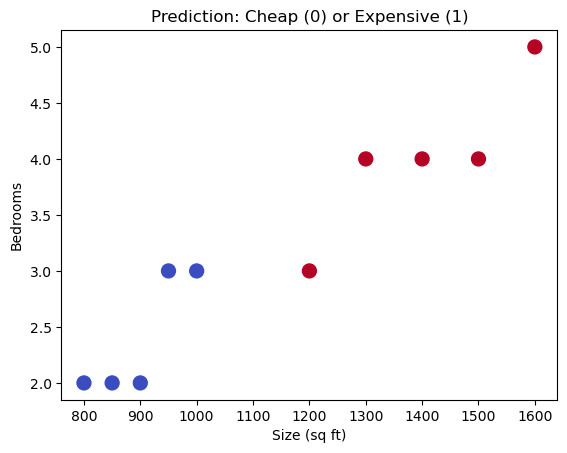

In [22]:
df['Predicted'] = model.predict(x)
plt.scatter(df['Size'], df['Bedrooms'], c=df['Predicted'], cmap='coolwarm', s=100)
plt.xlabel('Size (sq ft)')
plt.ylabel('Bedrooms')
plt.title('Prediction: Cheap (0) or Expensive (1)')
plt.show()

In [23]:
# Question 3: Predict if a person is healthy based on age and daily exercise (hours)

import pandas as pd
df = pd.DataFrame({
    'Age': [25, 30, 45, 50, 60, 22, 28, 35, 40, 55],
    'Exercise': [1, 0.5, 0.3, 0.2, 0.1, 1.5, 1, 0.8, 0.4, 0.2],
    'Healthy': [1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
})
df

,Age,Exercise,Healthy
0,25,1.0,1
1,30,0.5,1
2,45,0.3,0
3,50,0.2,0
4,60,0.1,0
5,22,1.5,1
6,28,1.0,1
7,35,0.8,1
8,40,0.4,0
9,55,0.2,0


In [24]:
x=df[['Age','Exercise']]
y=df['Healthy']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [26]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [27]:
model=DecisionTreeClassifier(random_state=1)

In [28]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

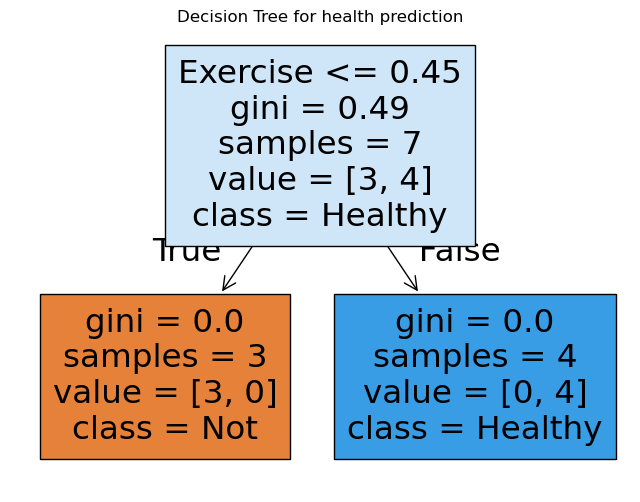

In [29]:
plt.figure(figsize=(8,6))
plot_tree(model,feature_names=['Age','Exercise'],class_names=['Not','Healthy'],filled=True)
plt.title('Decision Tree for health prediction')
plt.show()

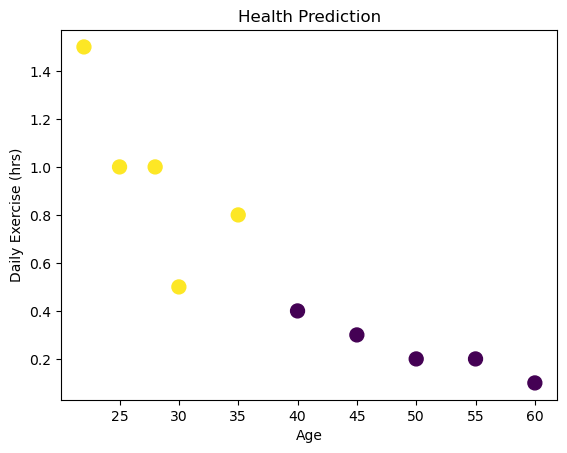

In [30]:
df['Predicted'] = model.predict(x)
plt.scatter(df['Age'], df['Exercise'], c=df['Predicted'], cmap='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('Daily Exercise (hrs)')
plt.title('Health Prediction')
plt.show()

In [31]:
# Question 4: Predict product category based on price and units sold

import pandas as pd
df = pd.DataFrame({
    'Price': [10, 12, 15, 18, 20, 25, 30, 35, 40, 45],
    'UnitsSold': [200, 180, 170, 150, 140, 120, 110, 90, 80, 70],
    'Category': ['Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High', 'High']
})
df

,Price,UnitsSold,Category
0,10,200,Low
1,12,180,Low
2,15,170,Low
3,18,150,Medium
4,20,140,Medium
5,25,120,Medium
6,30,110,High
7,35,90,High
8,40,80,High
9,45,70,High


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()
df['categoryencoder']=le.fit_transform(df['Category'])

In [34]:
df

,Price,UnitsSold,Category,categoryencoder
0,10,200,Low,1
1,12,180,Low,1
2,15,170,Low,1
3,18,150,Medium,2
4,20,140,Medium,2
5,25,120,Medium,2
6,30,110,High,0
7,35,90,High,0
8,40,80,High,0
9,45,70,High,0


In [35]:
x=df[['Price','UnitsSold']]
y=df['categoryencoder']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [37]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [38]:
model=DecisionTreeClassifier(random_state=1)

In [39]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

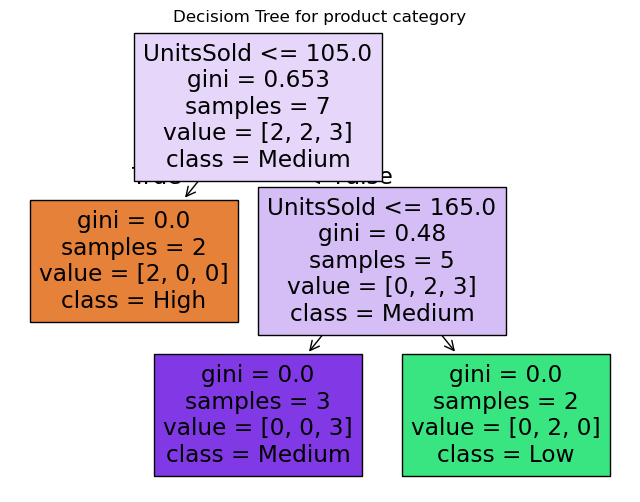

In [41]:
plt.figure(figsize=(8,6))
plot_tree(model,feature_names=['Price','UnitsSold'],class_names=le.classes_,filled=True)
plt.title('Decisiom Tree for product category')
plt.show()

## Linear Regression 

In [42]:
# Question 1: Predict house price based on size

import pandas as pd

df = pd.DataFrame({
    'Size': [800, 850, 900, 950, 1000, 1100, 1200, 1300, 1400, 1500],
    'Price': [150000, 160000, 165000, 170000, 175000, 185000, 195000, 205000, 215000, 225000]
})
df

,Size,Price
0,800,150000
1,850,160000
2,900,165000
3,950,170000
4,1000,175000
5,1100,185000
6,1200,195000
7,1300,205000
8,1400,215000
9,1500,225000


In [43]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [44]:
x=df[['Size']]
y=df['Price']

In [45]:
model=LinearRegression()

In [46]:
model.fit(x,y)

LinearRegression()

In [47]:
df['predicted']=model.predict(x)

In [48]:
df

,Size,Price,predicted
0,800,150000,153642.857143
1,850,160000,158785.714286
2,900,165000,163928.571429
3,950,170000,169071.428571
4,1000,175000,174214.285714
5,1100,185000,184500.000000
6,1200,195000,194785.714286
7,1300,205000,205071.428571
8,1400,215000,215357.142857
9,1500,225000,225642.857143


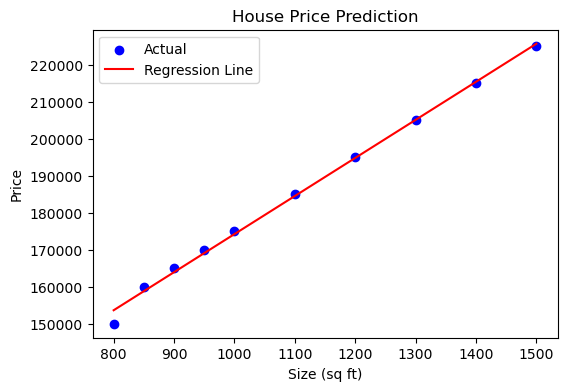

In [50]:
plt.figure(figsize=(6,4))
plt.scatter(df['Size'], df['Price'], color='blue', label='Actual')
plt.plot(df['Size'], df['predicted'], color='red', label='Regression Line')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()

In [51]:
# Question 2: Predict student test score based on hours studied

import pandas as pd
df = pd.DataFrame({
    'HoursStudied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Score': [50, 55, 60, 65, 70, 75, 80, 85, 88, 90]
})
df

,HoursStudied,Score
0,1,50
1,2,55
2,3,60
3,4,65
4,5,70
5,6,75
6,7,80
7,8,85
8,9,88
9,10,90


In [1]:
print('hello world')

hello world
